In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

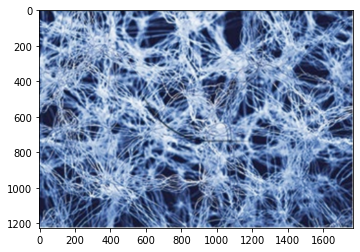

In [2]:
img = cv2.imread("input.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
# median = cv2.medianBlur(img, 3)
# plt.imshow(median, cmap="gray")

In [4]:
# # kernel = np.ones((3, 3))
# print(kernel)
# iterations = 500
# gray = cv2.cvtColor(median, cv2.COLOR_BGR2GRAY)
# dilated = cv2.dilate(gray, kernel, iterations)
# # dst = cv2.erode(gray, kernel, iterations)
# # closing = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
# # plt.imshow(dst, cmap="gray")
# plt.imshow(dilated, cmap="gray")

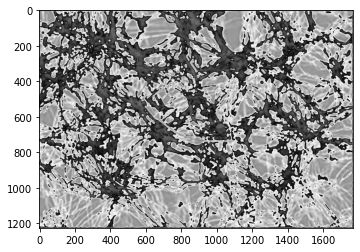

In [5]:
bg_substractor = cv2.createBackgroundSubtractorMOG2()
fg_mask = bg_substractor.apply(img)
plt.imshow(fg_mask)
plt.imshow(img[:, :, 0] + fg_mask, cmap="gray")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


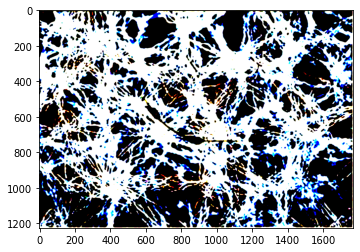

In [6]:
mean = np.mean(img, axis=(0, 1))
plt.imshow(img - mean)

In [61]:
edges = cv2.Canny(img[:, :, 1], 0, 100)
plt.imshow(edges)

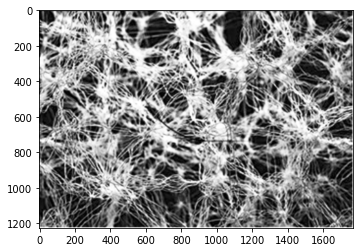

In [28]:
equ = cv2.equalizeHist(img[:, :, 0])
plt.imshow(equ, cmap="gray")

(1226, 1770, 3)


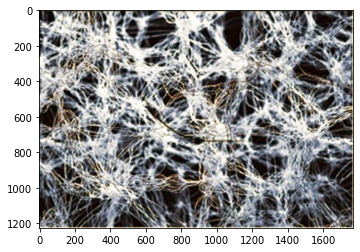

In [35]:
equ_r = cv2.equalizeHist(img[:, :, 0])
equ_g = cv2.equalizeHist(img[:, :, 1])
equ_b = cv2.equalizeHist(img[:, :, 2])
equ_2 = np.dstack([equ_r, equ_g, equ_b])
print(equ_2.shape)
plt.imshow(equ_2)

In [40]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl_r = clahe.apply(img[:, :, 0])
cl_g = clahe.apply(img[:, :, 1])
cl_b = clahe.apply(img[:, :, 2])
cl = np.dstack([cl_r, cl_g, cl_b])
plt.imshow(cl, cmap="gray")

In [62]:
# lines1 = cv2.HoughLinesP(cl[:, :, 0], rho=100, theta=np.pi/360, threshold=90, minLineLength=100, maxLineGap=1)
# lines1 = np.array(lines1)
# # plt.imshow(lines1, cmap="gray")

# decorated =  np.zeros(img.shape)
# for line in lines1:
#     x1, y1, x2, y2 = line[0]
#     cv2.line(decorated, (x1,y1), (x2,y2), (255, 0, ), 3)

# plt.imshow(decorated, cmap="gray")

In [64]:
# rho = 100
# theta = np.pi / 100
# threshold = 90
# minLineLength = 100
# maxLineGap = 0
# lines_r = cv2.HoughLinesP(cl[:, :, 0], rho=rho, theta=theta, threshold=threshold, minLineLength=minLineLength, maxLineGap=maxLineGap)
# lines_r = np.array(lines1)
# lines_g = cv2.HoughLinesP(cl[:, :, 1], rho=rho, theta=theta, threshold=threshold, minLineLength=minLineLength, maxLineGap=maxLineGap)
# lines_g = np.array(lines1)
# lines_b = cv2.HoughLinesP(cl[:, :, 2], rho=90, theta=theta, threshold=threshold, minLineLength=minLineLength, maxLineGap=maxLineGap)
# lines_b = np.array(lines1)
# # plt.imshow(lines1, cmap="gray")

# decorated =  np.zeros(img.shape)
# for line in lines_r:
#     x1, y1, x2, y2 = line[0]
#     cv2.line(decorated, (x1,y1), (x2,y2), (255, 0, 0), 3)

# for line in lines_g:
#     x1, y1, x2, y2 = line[0]
#     cv2.line(decorated, (x1,y1), (x2,y2), (0, 255, 0), 3)
    
# for line in lines_b:
#     x1, y1, x2, y2 = line[0]
#     cv2.line(decorated, (x1,y1), (x2,y2), (0, 0, 255), 3)


# plt.imshow(decorated)

In [172]:
blured1 = cv2.bilateralFilter(img,9,75,75)
blured = blured2 = cv2.medianBlur(cl, 11)
plt.imshow(np.hstack([blured1, blured2]), cmap="gray")

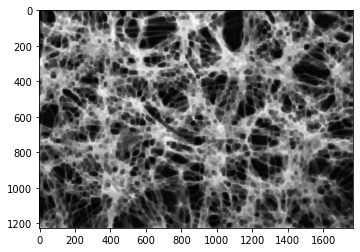

In [165]:
kernel = np.ones((11, 11))
iterations = 500
gray = cv2.cvtColor(blured, cv2.COLOR_BGR2GRAY)
gray = cv2.erode(gray, kernel, iterations)
# gray = cv2.dilate(gray, kernel, iterations)
plt.imshow(gray, cmap="gray")

In [166]:
circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,dp=1,minDist=5,
                           param1=50,param2=100,minRadius=0,maxRadius=300)
print(circles)

None


In [167]:
circles = np.uint16(np.around(circles))
cimg = gray.copy()

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(255,0,0),10)
plt.imshow(cimg)

TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable rint method

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


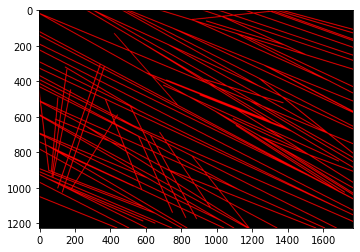

In [168]:
lines1 = cv2.HoughLinesP(gray, rho=100, theta=np.pi/360, threshold=100, minLineLength=400, maxLineGap=1)
lines1 = np.array(lines1)

plt.imshow(img)
decorated =  np.zeros(img.shape)
for line in lines1:
    x1, y1, x2, y2 = line[0]
    cv2.line(decorated, (x1,y1), (x2,y2), (255,0,0), 3)

plt.imshow(decorated, cmap="gray")